La palabra aliasing surge del hecho de que dos ondas sinusoidales diferentes con frecuencias $f0$, $f1$ generan las mismas muestras, cuando $f_1 = f_0 + F_s$, donde $F_s$ es la frecuencia de muestreo. 
Es decir, a partir de una secuencia de muestras de una onda sinusoidal es imposible saber cuál era la frecuencia de la onda sinusoidal original. 
El muestreo es ambiguo y dos frecuencias diferentes $f_0$, $f_1$ se asignan a los mismos puntos de muestreo.

Podemos mostrar esto en una forma simple: supongamos que tenemos una función $x_0(t) = sin(2 \pi f_0t)$
y una función $x1(t) = sin(2 \pi (f_0 + Fs) t)$ y muestreamos ambas señales con la frecuencia de muestreo $F_s$


$$x_1[n] = sin(2 \pi f_0 \frac{n}{F_s})$$

$$x_2[n] = sin(2 \pi (f_0 + F_s) \frac{n}{F_s})$$

$$= sin(2 \pi f_0 \frac{n}{F_s} + 2 \pi n) = sin(2 \pi f_0 \frac{n}{F_s}) = x1[n]$$

Como vemos, ambas señales crearían las mismas muestras. 
También podemos mostrar otra propiedad, a saber, que dos ondas sinusoidales de frecuencias $f_0$ y $f_1 = F_s - f_0$

También cree las mismas muestras hasta un cambio de signo:
$$x_1[n] = sin(2 \pi f_0 \frac{n}{F_s})$$

$$x_2[n] = sin(2 \pi (f_0 - F_s) \frac{n}{F_s})$$

$$= sin(2 \pi f_0 \frac{n}{F_s} - 2 \pi n) = sin(-2 \pi f_0 \frac{n}{F_s}) = -x1[n]$$


Es decir. también las frecuencias $f_0$ y $F_s − f_0$ corresponden a los mismos puntos de muestreo. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
%matplotlib inline


params = {'legend.fontsize': 14,
          'figure.figsize': (10, 5),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)


Fs     = 5            # the sampling frequency
F_plot = 100          # the frequency used for plotting the time-continuous curves
T      = 2            # the time-span we'll cover
t      = np.arange(0, T, 1/Fs)            # the sample times
t_plot = np.arange(0, max(t), 1/F_plot)  # time instants for plotting


def showAlias(Fs,F_plot,f1):
    f2 = min(f1, Fs-f1)                  # determine the alias frequency
    xt1 = lambda t: np.cos(2*np.pi*f1*t) # create both sine-functions
    xt2 = lambda t: np.cos(2*np.pi*f2*t)
    
    # Plot the curves
    plt.gcf().clear() # il
    
    # plot the signals
    plt.subplot(121)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t_plot, xt1(t_plot), 'b-', lw=2, label='input signal')
    
    plt.stem(t,      xt1(t),                  label='sampled points')
    plt.plot(t,      xt1(t), 'bo', lw=3)
    
    plt.plot(t_plot, xt2(t_plot), 'g-',       label='after sampling')
    plt.grid()
    plt.xlabel('$t$'); 
    plt.ylabel('$x(t), x[n]$')
    plt.legend(fontsize=10) # il
    plt.ylim([-1,1.5])
   
    # plot the spectrum of the signals
    t_freq = np.arange(0, 20*T, 1/F_plot) 
    x1 = xt1(t_freq)
    x2 = xt2(t_freq)
    X1 = fft(x1)/ len(x1)
    X2 = fft(x2)/ len(x2)
    f =  fftfreq(len(x1), 1/F_plot) 
    
    plt.subplot(122)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(f, abs(X1), 'b', lw=2, label='input sampling f='+str("{:1.1f}".format(f1)) )
    plt.plot(f, abs(X2), 'g', lw=1, label='after sampling f='+str("{:1.1f}".format(f2)) )
    plt.xlim([-Fs,Fs])
    plt.ylim([-0.2,0.7])
    plt.legend(fontsize=10) # il
    plt.vlines(Fs/2, 0, Fs/2, linestyles ="dashed", colors ="k")
    plt.vlines(-Fs/2, 0, Fs/2, linestyles ="dashed", colors ="k")

<IPython.core.display.Javascript object>


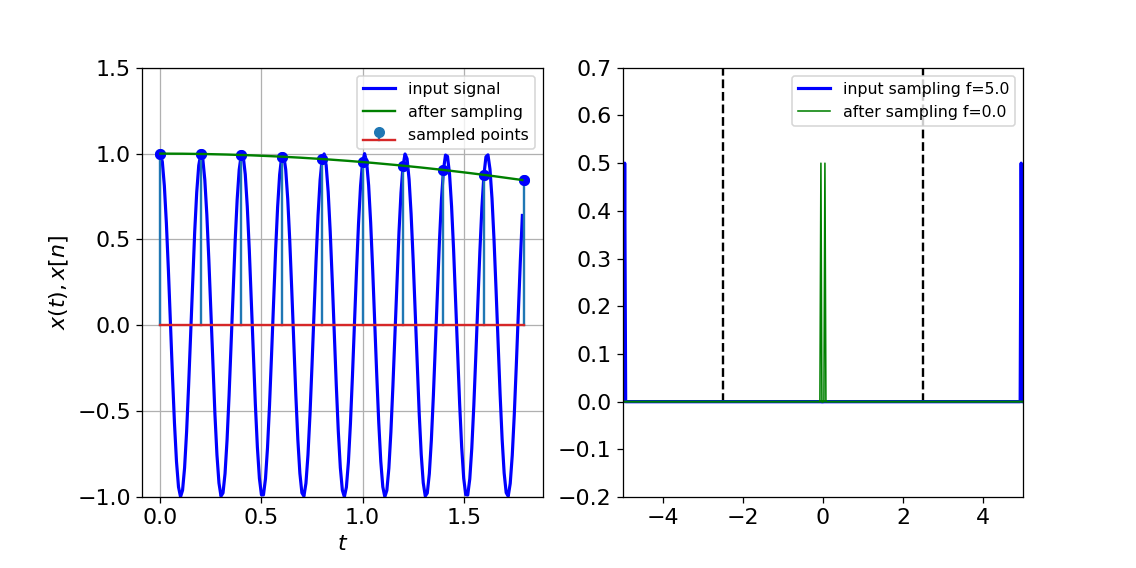

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance 

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance 

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance 

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance 

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance 

In [2]:
%matplotlib notebook 

fig, ax = plt.subplots()  
plt.subplot(121)
plt.subplot(122)
plt.ion()

fig.show()
fig.canvas.draw()

for i in np.arange(0, Fs, Fs/100) : #
    ax.clear()
    showAlias(Fs,F_plot,i)
    fig.canvas.draw()
    
